In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#Store the data into dataframe variable

df_gld = pd.read_csv('./data/GLD (Gold Shares 01-01-2008 to 03-07-2022).csv')
df_spy = pd.read_csv('./data/SPY (S&P500 ETF 01-01-2008 to 03-07-2022)).csv')
df_tlt = pd.read_csv('./data/TLT (US Treasury Bonds ETF 01-01-2008 to 03-07-2022).csv')
df_sgd = pd.read_csv('./data/SGD=X (01-01-2008 to 03-07-2022).csv')
df_oil = pd.read_csv('./data/USO (US Oil Index 01-01-2008 to 03-07-2022).csv')

In [3]:
df_gld

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,83.559998,85.139999,83.440002,84.860001,84.860001,12291100
1,2008-01-03,84.870003,85.940002,84.599998,85.570000,85.570000,9553900
2,2008-01-04,85.339996,85.550003,84.430000,85.129997,85.129997,8402200
3,2008-01-07,85.239998,85.260002,84.570000,84.769997,84.769997,6944300
4,2008-01-08,86.279999,87.129997,86.160004,86.779999,86.779999,9567900
...,...,...,...,...,...,...,...
3646,2022-06-27,170.600006,170.669998,169.750000,169.899994,169.899994,5719700
3647,2022-06-28,170.070007,170.210007,169.509995,169.619995,169.619995,2982700
3648,2022-06-29,170.580002,170.699997,169.169998,169.490005,169.490005,4785600
3649,2022-06-30,169.509995,169.960007,168.240005,168.460007,168.460007,9144400


In [55]:
#Create a new dataframe having only closing prices of each Crypto coins
index_data=pd.DataFrame({'SPY':df_spy['Close'],'GLD':df_gld['Close'],'TLT':df_tlt['Close'], 'OIL':df_oil['Close']})


In [56]:
index_data.tail()

,SPY,GLD,TLT,OIL
3646,388.589996,169.899994,111.599998,82.930000
3647,380.649994,169.619995,112.120003,84.720001
3648,380.339996,169.490005,113.870003,82.949997
3649,377.250000,168.460007,114.870003,80.349998
3650,381.239990,168.320007,115.820000,81.669998


In [59]:
def priceCorrPrint():
    
    correlation = index_data.corr("pearson")
    plt.subplots(figsize=(5,5))
    sns.heatmap(correlation, annot=True, fmt='.2%')

    sns.histplot(index_data['SPY'],color='green')
    return

In [53]:
def priceCorr():
    print(correlation['SPY'])
    return

# def priceVolatility():
#     print(index_data['SPY'].std())
#     return

In [41]:
def plotDailyClosing():
    
    plt.figure(figsize=(12.2,4.5))

    for c in index_data.columns.values:
      plt.plot(index_data[c], label=c, lw=0.5, alpha=1)

    plt.title('Daily Closing Price')
    plt.xlabel('No. of days (01-01-2008 to 03-07-2022)')
    plt.xticks(rotation=10)
    plt.ylabel('Price in USD')
    plt.legend(index_data.columns.values, loc='upper right')
    plt.show()
    return 

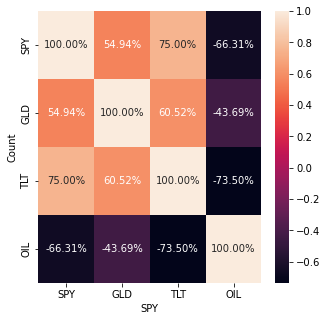

In [60]:
priceCorrPrint()

In [67]:
#culmulative returns 
def culSimpleReturn():
    simpleReturn=index_data.pct_change(1)
    culSimpleReturn=(simpleReturn+1).cumprod()

    plt.figure(figsize=(12.2,4.5))

    for c in culSimpleReturn.columns.values:
      plt.plot(culSimpleReturn[c], label=c, lw=0.5, alpha=1)

    plt.title('Cumulative Simple Returns')
    plt.xlabel('No. of days (01-01-2008 to 03-07-2022)')
    plt.xticks(rotation=10)
    plt.ylabel('USD growth / USD')
    plt.legend(index_data.columns.values, loc='upper right')
    plt.show()
    return 


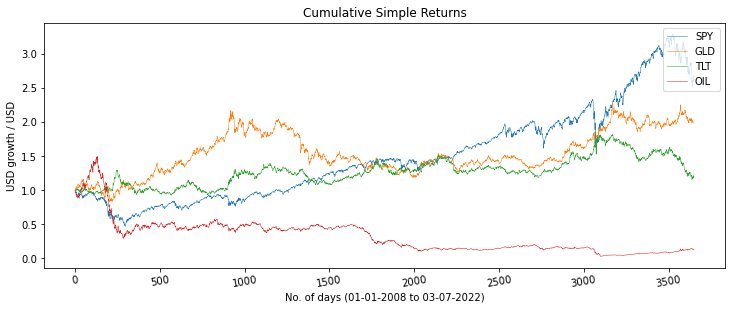

In [68]:
culSimpleReturn()

In [81]:
#get trading signals using STMA and LTMA crossover
#use a smaller dataset to try first

truncated_gld_data = df_gld[:1000]
truncated_gld_data.tail()

#use fibonacci no. for STMA and LTMA: 13, 55
shortTermWindow = 13
longTermWindow = 55

#setting up the new dataframe
STMA = pd.DataFrame() 
STMA['Close']= truncated_gld_data['Close'].rolling(window = shortTermWindow).mean()

LTMA = pd.DataFrame() 
LTMA['Close']= truncated_gld_data['Close'].rolling(window = longTermWindow).mean()

moving_avg = pd.DataFrame()
moving_avg['GLD'] = truncated_gld_data['Close']
moving_avg['STMA'] = STMA['Close']
moving_avg['LTMA'] = LTMA['Close']
moving_avg.tail()

#getting the crossover price points 

def signals(moving_avg):
    
    sigBuy = []
    sigSell = []
    crossOver = -1 #checker: 1 means STMA crossing above LTMA (buy), 0 means LTMA crossing above STMA (sell)

    for i in range(len(moving_avg)):
        if moving_avg['STMA'][i] < moving_avg['LTMA'][i]:
            if crossOver != 0:
                sigBuy.append(np.nan)
                sigSell.append(moving_avg['GLD'][i])
                crossOver = 0
            else: 
                sigBuy.append(np.nan)
                sigSell.append(np.nan)

        elif moving_avg['STMA'][i] > moving_avg['LTMA'][i]:
            if crossOver != 1:
                sigBuy.append(moving_avg['GLD'][i])
                sigSell.append(np.nan)
                crossOver = 1
            else:
                sigBuy.append(np.nan)
                sigSell.append(np.nan)
            
        else: 
            sigBuy.append(np.nan)
            sigSell.append(np.nan)

    return(sigBuy, sigSell)

buy_sell = signals(moving_avg)
moving_avg['Buy Price'] = buy_sell[0]
moving_avg['Sell Price'] = buy_sell[1]



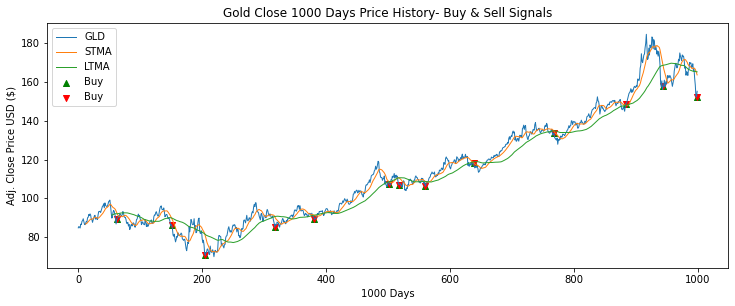

In [86]:
#     for c in moving_avg.columns.values:
#       plt.plot(moving_avg[c], label=c, lw=1, alpha=1)

#     plt.title('Moving Averages')
#     plt.xlabel('No. of days (1000)')
#     plt.xticks(rotation=10)
#     plt.ylabel('Prices')
#     plt.legend(moving_avg.columns.values, loc='upper right')
#     plt.show()

plt.figure(figsize=(12.2,4.5))

plt.plot(truncated_gld_data['Close'], label='GLD', lw=1, alpha=1)
plt.plot(STMA['Close'], label='STMA', lw=1, alpha=1)
plt.plot(LTMA['Close'], label='LTMA', lw=1, alpha=1)

plt.scatter(moving_avg.index, moving_avg['Buy Price'], label = 'Buy', marker = "^", color="green")
plt.scatter(moving_avg.index, moving_avg['Buy Price'], label = 'Buy', marker = "v", color="red")

plt.title('Gold Close 1000 Days Price History- Buy & Sell Signals')
plt.xlabel('1000 Days')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,83.559998,85.139999,83.440002,84.860001,84.860001,12291100
1,2008-01-03,84.870003,85.940002,84.599998,85.570000,85.570000,9553900
2,2008-01-04,85.339996,85.550003,84.430000,85.129997,85.129997,8402200
3,2008-01-07,85.239998,85.260002,84.570000,84.769997,84.769997,6944300
4,2008-01-08,86.279999,87.129997,86.160004,86.779999,86.779999,9567900
...,...,...,...,...,...,...,...
995,2011-12-12,162.350006,162.410004,161.139999,161.990005,161.990005,15339400
996,2011-12-13,161.860001,163.190002,157.759995,158.449997,158.449997,25040400
997,2011-12-14,156.789993,157.339996,152.050003,152.889999,152.889999,42334400
998,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900
